# Modelo de carga y descarga de un capacitor #
  
En este proyecto se mostrará, mediante fenómeno de carga y descarga de un capacitor la implementación de un modelo de machine learning para poder predecir el voltaje en diferentes instantes de tiempo. Se explicará el modelo utilizado de machine learning, árboles de decisión regresión.\\
Esto con la finalidad de mostrar diferentes herramientas para la manipulación y análisis de datos, dar certeza de la funcionalidad de los modelos de regresión actualmente utilizados para intentar predecir fenómenos socioeconómicos.

In [1]:
# Cargar la librerias que se van a utilizar

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.gridspec as gridspec
import uncertainties
from uncertainties import ufloat
from IPython.display import Image

In [2]:
# subir los datos del archivo datos1.csv utilzando pandas

Datos=pd.read_csv('datos1.csv')
df=pd.DataFrame(Datos) # Guardando los datos en un Dataframe
df.head() # Mostrando las primeras 5 líneas del DataFrame

,V1,dV1,T1,dT1,V2,dV2,T2,dT
0,0.05000,0.00075,0.04,0.0006,-0.00875,0.00131,0.08,0.0012
1,0.09375,0.00141,0.08,0.0012,-0.16870,0.00250,0.12,0.0018
2,0.18750,0.00280,0.12,0.0018,-0.27500,0.00410,0.16,0.0024
3,0.23750,0.00360,0.16,0.0024,-0.33750,0.00510,0.20,0.0030
4,0.31880,0.00460,0.20,0.0030,-0.38750,0.00580,0.24,0.0036


- V1 : Potencial en el proceso de carga del capacitor en función del tiempo.  
- dV1 : Incertidumbre del potencial en el proceso de carga en función del tiempo.  
- T1 : Tiempo en el proceso de carga del capacitor.  
- dT1 : Incertidumbre del tiempo en el proceso de carga del capacitor.  
- V2 : Potencial en el proceso de descarga del capacitor en función del tiempo.  
- dV2 : Incertidumbre del potencial en el proceso de descarga en función del tiempo.  
- T2 : Tiempo en el proceso de descarga del capacitor.  
- dT : Incertidumbre del tiempo en el proceso de descarga del capacitor.  

## Gráficas##

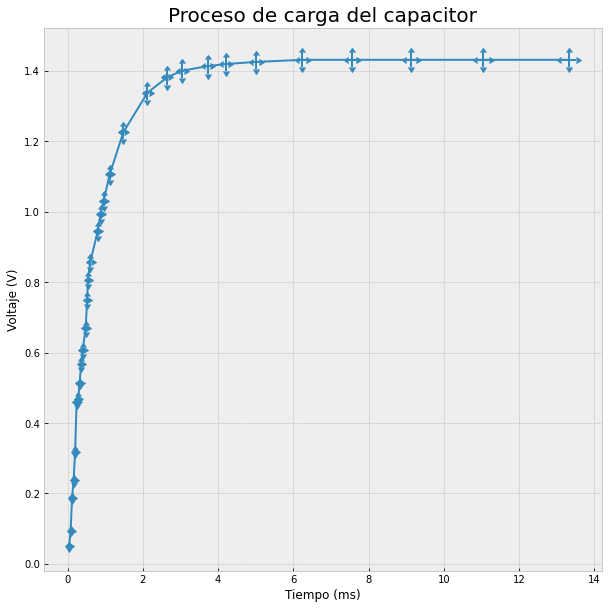

In [3]:
plt.figure(figsize=(10,10))
plt.style.use('bmh')

plt.errorbar(df['T1'],df['V1'],xerr=df['dT1'],yerr=df['dV1'],uplims=True,lolims=True,xuplims=True,xlolims=True)
plt.ylabel('Voltaje (V)')
plt.xlabel('Tiempo (ms)')
plt.title('Proceso de carga del capacitor', fontsize=20)

plt.grid('white')
plt.show()

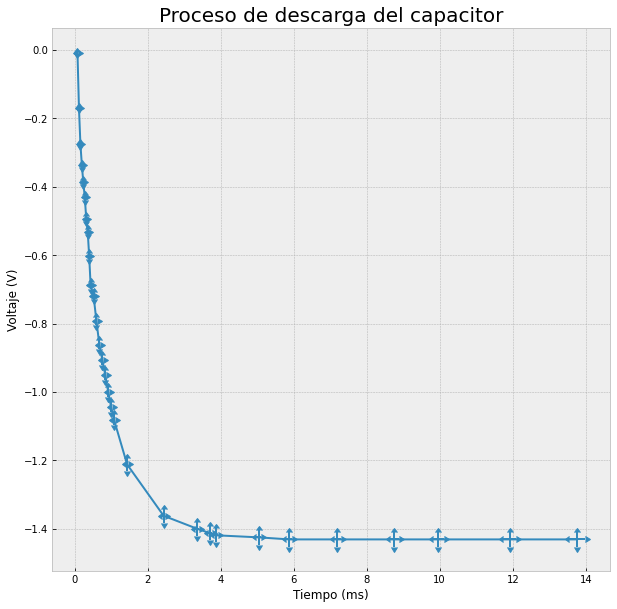

In [4]:
plt.figure(figsize=(10,10))
plt.style.use('bmh')

plt.errorbar(df['T2'],df['V2'],xerr=df['dT'],yerr=df['dV2'],uplims=True,lolims=True,xuplims=True,xlolims=True)
plt.ylabel('Voltaje (V)')
plt.xlabel('Tiempo (ms)')
plt.title('Proceso de descarga del capacitor', fontsize=20)

plt.grid('white')
plt.show()

Proceso de carga esta dado por:
$$V_{t \ C}=V_{0}(1-e^{-t/RC}) \ , \ Q_{t \ C}=CV_{0}(1-e^{-t/RC})$$
Proceso de descarga esta dado por:
$$V_{t \ D}=V_{0}e^{-t/RC} \ , \ Q_{t \ D}=CV_{0}e^{-t/RC}$$

In [5]:
# Calculando las incertudumbres correspondientes de V en el proceso de carga.

Voltaje1=[]
for i in range(30):
    Voltaje1.append(ufloat(df.iloc[i]['V1'],df.iloc[i]['dV1']))
print(Voltaje1)

[0.05+/-0.00075, 0.09375+/-0.00141, 0.1875+/-0.0028, 0.2375+/-0.0036, 0.3188+/-0.0046, 0.4603+/-0.0061, 0.4688+/-0.006999999999999999, 0.5125+/-0.0007700000000000001, 0.5687+/-0.0085, 0.6062+/-0.0091, 0.6687+/-0.01, 0.75+/-0.0112, 0.8063+/-0.0121, 0.8563+/-0.0128, 0.9437+/-0.0142, 0.9938+/-0.0149, 1.0308+/-0.016, 1.1059999999999999+/-0.016, 1.225+/-0.018000000000000002, 1.337+/-0.02, 1.381+/-0.021, 1.4+/-0.021, 1.413+/-0.021, 1.419+/-0.021, 1.425+/-0.021, 1.431+/-0.021, 1.431+/-0.021, 1.431+/-0.021, 1.431+/-0.021, 1.431+/-0.021]


In [6]:
# Calculando las incertudumbres correspondientes de T en el proceso de carga.

Tiempo1=[]
for i in range(30):
    Tiempo1.append(ufloat(df.iloc[i]['T1'],df.iloc[i]['dT1']))
print(Tiempo1)

[0.04+/-0.0006, 0.08+/-0.0012, 0.12+/-0.0018, 0.16+/-0.0024, 0.2+/-0.003, 0.24+/-0.0036, 0.28+/-0.0042, 0.32+/-0.0048, 0.36+/-0.0054, 0.4+/-0.006, 0.48+/-0.0072, 0.52+/-0.0078, 0.54+/-0.009000000000000001, 0.6+/-0.0096, 0.8+/-0.012, 0.88+/-0.0132, 0.96+/-0.0144, 1.12+/-0.017, 1.48+/-0.022000000000000002, 2.12+/-0.032, 2.64+/-0.04, 3.04+/-0.046, 3.72+/-0.055999999999999994, 4.2+/-0.063, 5.0+/-0.075, 6.24+/-0.094, 7.56+/-0.113, 9.129+/-0.13699999999999998, 11.04+/-0.17, 13.32+/-0.2]


In [7]:
# Calculando las incertudumbres correspondientes de V en el proceso de descarga.

Voltaje2=[]
for i in range(30):
    Voltaje2.append(ufloat(df.iloc[i]['V2'],df.iloc[i]['dV2']))
print(Voltaje2)

[-0.00875+/-0.00131, -0.1687+/-0.0025, -0.275+/-0.0041, -0.3375+/-0.0051, -0.3875+/-0.0058, -0.4312+/-0.0065, -0.4937+/-0.0074, -0.5312+/-0.008, -0.6026+/-0.0091, -0.6887+/-0.0103, -0.7187+/-0.0107, -0.7937+/-0.012, -0.8625+/-0.013000000000000001, -0.9063+/-0.013999999999999999, -0.95+/-0.0142, -0.9993799999999999+/-0.015, -1.044+/-0.016, -1.081+/-0.016, -1.212+/-0.018000000000000002, -1.3619999999999999+/-0.02, -1.4+/-0.021, -1.413+/-0.021, -1.419+/-0.021, -1.425+/-0.021, -1.431+/-0.021, -1.431+/-0.021, -1.431+/-0.021, -1.431+/-0.021, -1.431+/-0.021, -1.431+/-0.021]


In [8]:
# Calculando las incertudumbres correspondientes de T en el proceso de descarga.

Tiempo2=[]
for i in range(30):
    Tiempo2.append(ufloat(df.iloc[i]['T2'],df.iloc[i]['dT']))
print(Tiempo2)

[0.08+/-0.0012, 0.12+/-0.0018, 0.16+/-0.0024, 0.2+/-0.003, 0.24+/-0.0036, 0.28+/-0.0042, 0.32+/-0.0048, 0.36+/-0.0054, 0.4+/-0.006, 0.44+/-0.0066, 0.52+/-0.0078, 0.6+/-0.009000000000000001, 0.68+/-0.0102, 0.76+/-0.0114, 0.84+/-0.0126, 0.92+/-0.0138, 1.0+/-0.015, 1.08+/-0.016, 1.44+/-0.022000000000000002, 2.44+/-0.037000000000000005, 3.36+/-0.05, 3.72+/-0.055999999999999994, 3.88+/-0.057999999999999996, 5.04+/-0.076, 5.88+/-0.08800000000000001, 7.2+/-0.10800000000000001, 8.76+/-0.131, 9.96+/-0.149, 11.92+/-0.18, 13.76+/-0.21]


## Modelo a usar Árboles de decisión regresión ##

<img src="Imagen.png"/>

$$Promedio \ , \ \vec{x} = \frac{\sum x_{i}}{n}$$
$$ $$
$$Desviación \ Estandar \ , \ S = \sqrt{ \frac{(x- \vec{x})^{2} }{n} } $$
$$ $$
$$Coeficiente \ de \ variación \ , \ CV = \frac{S}{x} \times 100 \%$$

In [9]:
#Importamos las librerias a usar

from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model
from sklearn.tree import DecisionTreeRegressor

In [10]:
# Reacomodamos los datos

X1=np.array(df.T1).reshape(-1,1)
Y1=np.array(df.V1)

In [11]:
# Separamos el data frame en datos de prueba y datos a ser intrenados

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1,Y1,test_size=0.2)

In [12]:
# Cargamos el modelo con una profundidad de 3

poli1 = DecisionTreeRegressor(max_depth=3)

In [13]:
# Entremos el modelo con los datos separados anteriormente

poli1.fit(X_train1,Y_train1)
Y_pred1=poli1.predict(X_test1)
Y_pred1

array([0.5233    , 1.42142857, 0.74166667, 1.42142857, 0.1875    ,
       0.98725   ])

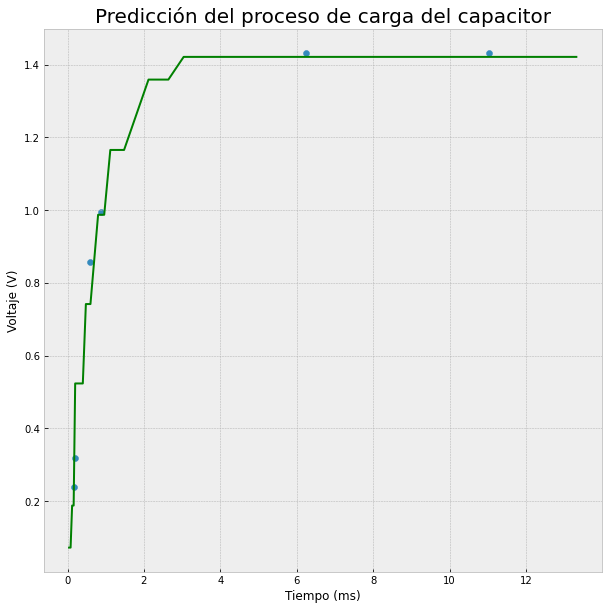

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(X_test1,Y_test1)
plt.plot(X1,poli1.predict(X1),color='g')
plt.ylabel('Voltaje (V)')
plt.xlabel('Tiempo (ms)')
plt.title('Predicción del proceso de carga del capacitor', fontsize=20)
plt.show()

In [15]:
# Precisión del modelo en el proceso de carga

print('R^2:',poli1.score(X_train1,Y_train1))

R^2: 0.9924232795468445


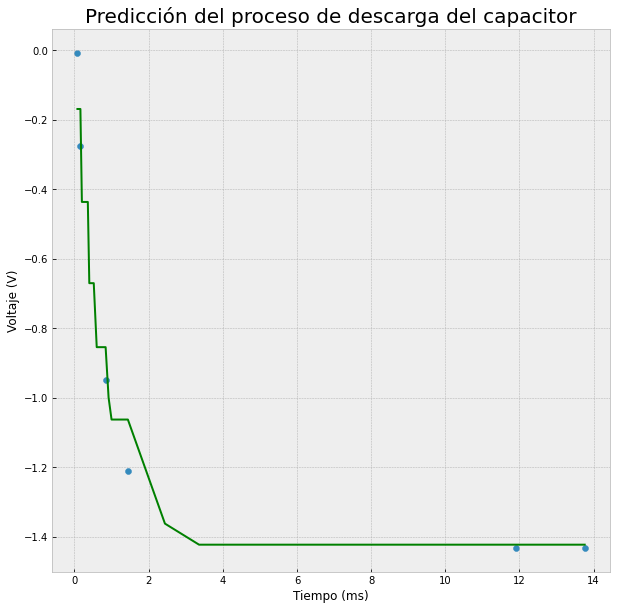

In [19]:
# Se repite lo mismo que en la parte anterior pero con el proceso de descarga

X2=np.array(df.T2).reshape(-1,1)
Y2=np.array(df.V2)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2,Y2,test_size=0.2)
poli2 = DecisionTreeRegressor(max_depth=3)
poli2.fit(X_train2,Y_train2)
Y_pred2=poli2.predict(X_test2)

plt.figure(figsize=(10,10))
plt.scatter(X_test2,Y_test2)
plt.plot(X2,poli2.predict(X2),color='g')
plt.ylabel('Voltaje (V)')
plt.xlabel('Tiempo (ms)')
plt.title('Predicción del proceso de descarga del capacitor', fontsize=20)
plt.show()

In [20]:
# Precisión del modelo en el proceso de descarga

print('R^2:',poli2.score(X_train2,Y_train2))

R^2: 0.9905707787217422
